In [1]:
import yt

In [2]:
ds = yt.load('/Users/jillnaiman1/data/IsolatedGalaxy/galaxy0030/galaxy0030')

yt : [INFO     ] 2016-10-10 10:54:32,149 Parameters: current_time              = 0.00600002000283
yt : [INFO     ] 2016-10-10 10:54:32,149 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2016-10-10 10:54:32,150 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2016-10-10 10:54:32,151 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2016-10-10 10:54:32,152 Parameters: cosmological_simulation   = 0.0


In [3]:
ds.field_list

Parsing Hierarchy : 100%|██████████| 173/173 [00:00<00:00, 32903.21it/s]
yt : [INFO     ] 2016-10-10 10:54:32,176 Gathering a field list (this may take a moment.)


[('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_type'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('enzo', 'Average_creation_time'),
 ('enzo', 'Bx'),
 ('enzo', 'By'),
 ('enzo', 'Bz'),
 ('enzo', 'Cooling_Time'),
 ('enzo', 'Dark_Matter_Density'),
 ('enzo', 'Density'),
 ('enzo', 'Electron_Density'),
 ('enzo', 'Forming_Stellar_Mass_Density'),
 ('enzo', 'Galaxy1Colour'),
 ('enzo', 'Galaxy2Colour'),
 ('enzo', 'HII_Density'),
 ('enzo', 'HI_Density'),
 ('enzo', 'HeIII_Density'),
 ('enzo', 'HeII_Density'),
 ('enzo', 'HeI_Density'),
 ('enzo', 'MBHColour'),
 ('enzo', 'Metal_Density'),
 ('enzo', 'PhiField'),
 ('enzo', 'Phi_pField'),
 ('enzo', 'SFR_Density'),
 ('enzo', 'Star_Particle_Density'),
 ('enzo', 'Temperature'),
 ('enzo', '

In [4]:
ds.derived_field_list

[('all', 'age'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 ('al

In [5]:
print(ds.field_info["gas", "vorticity_x"].get_source())

    def _vorticity_x(field, data):
        f  = (data[ftype, "velocity_z"][sl_center,sl_right,sl_center] -
              data[ftype, "velocity_z"][sl_center,sl_left,sl_center]) \
              / (div_fac*just_one(data["index", "dy"]))
        f -= (data[ftype, "velocity_y"][sl_center,sl_center,sl_right] -
              data[ftype, "velocity_y"][sl_center,sl_center,sl_left]) \
              / (div_fac*just_one(data["index", "dz"]))
        new_field = data.ds.arr(np.zeros_like(data[ftype, "velocity_z"],
                                              dtype=np.float64),
                                f.units)
        new_field[sl_center, sl_center, sl_center] = f
        return new_field



In [6]:
ds.print_stats()

level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	     1	         32768	            32
  1	     8	         34304	            33
  2	     8	        181888	            57
  3	     8	        646968	            87
  4	    15	        947856	            99
  5	    51	        874128	            96
  6	    18	        786328	            93
  7	    28	        446776	            77
  8	    36	        209400	            60
----------------------------------------------
   	   173	       4160416


t = 6.00002000e-03 = 1.39768066e+16 s = 4.42898275e+08 years

Smallest Cell:
	Width: 1.221e-04 Mpc
	Width: 1.221e+02 pc
	Width: 2.518e+07 AU
	Width: 3.767e+20 cm


In [7]:
ds.domain_width

YTArray([ 1.,  1.,  1.]) code_length

In [8]:
dd = ds.all_data()

In [9]:
dd[('gas','density')]

YTArray([  4.92775113e-31,   4.94005233e-31,   4.93824694e-31, ...,
         1.12879234e-25,   1.59561490e-25,   1.09824903e-24]) g/cm**3

In [10]:
sp = ds.sphere("max", (10, "kpc"))

yt : [INFO     ] 2016-10-10 10:54:34,217 Max Value is 7.73427e-24 at 0.5040893554687500 0.4998168945312500 0.5001831054687500


In [11]:
list(sp.quantities.keys())

['SpinParameter',
 'MinLocation',
 'WeightedVariance',
 'TotalMass',
 'AngularMomentumVector',
 'WeightedAverageQuantity',
 'SampleAtMaxFieldValues',
 'TotalQuantity',
 'CenterOfMass',
 'BulkVelocity',
 'Extrema',
 'MaxLocation',
 'SampleAtMinFieldValues']

In [12]:
sp.quantities.total_mass()

YTArray([  3.27209035e+42,   8.58102338e+43]) g

In [13]:
help(sp.quantities.total_mass)

Help on TotalMass in module yt.data_objects.derived_quantities object:

class TotalMass(TotalQuantity)
 |  Calculates the total mass of the object. Returns a YTArray where the
 |  first element is total gas mass and the second element is total particle 
 |  mass.
 |  
 |  Examples
 |  --------
 |  
 |  >>> ds = load("IsolatedGalaxy/galaxy0030/galaxy0030")
 |  >>> ad = ds.all_data()
 |  >>> print ad.quantities.total_mass()
 |  
 |  Method resolution order:
 |      TotalMass
 |      TotalQuantity
 |      DerivedQuantity
 |      yt.utilities.parallel_tools.parallel_analysis_interface.ParallelAnalysisInterface
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from TotalQuantity:
 |  
 |  count_values(self, fields)
 |  
 |  process_chunk(self, data, fields)
 |  
 |  reduce_intermediate(self, values)
 |  
 |  ---------------------------------------------------

In [14]:
def _emissivity(field, data):
    newfield = data[('gas','density')]**2*data[('gas','temperature')]**0.5
    return(newfield)

ds.add_field('emissivity', function = _emissivity, units="K**0.5*g**2/cm**6")
dd = ds.all_data()
print(dd['emissivity'])
                                               

[  2.34630700e-59   2.36026596e-59   2.35791707e-59 ...,   1.38554247e-48
   2.74071287e-48   1.21654068e-46] K**0.5*g**2/cm**6


yt : [INFO     ] 2016-10-10 10:54:35,678 Max Value is 2.48261e+07 at 0.4976196289062500 0.5022583007812500 0.4998168945312500
yt : [INFO     ] 2016-10-10 10:54:35,725 xlim = 0.452264 0.552253
yt : [INFO     ] 2016-10-10 10:54:35,726 ylim = 0.449822 0.549812
yt : [INFO     ] 2016-10-10 10:54:35,727 xlim = 0.452264 0.552253
yt : [INFO     ] 2016-10-10 10:54:35,728 ylim = 0.449822 0.549812
yt : [INFO     ] 2016-10-10 10:54:35,736 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


[ 0.49761963  0.5022583   0.49981689] code_length



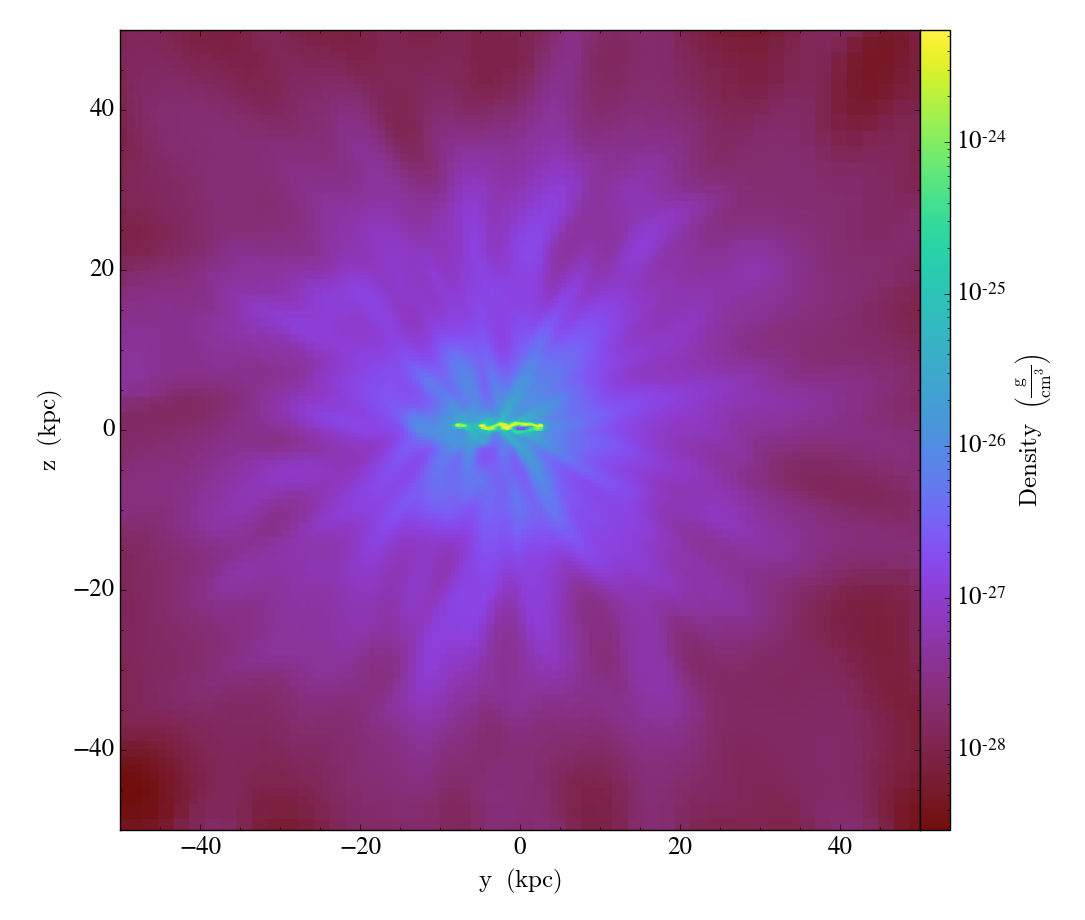

In [15]:
max_val, max_loc = ds.find_max(('gas','temperature'))
print(max_loc)
s = yt.SlicePlot(ds, "x", "density", center=max_loc, width=(100,"kpc"))
s.show()

yt : [INFO     ] 2016-10-10 10:54:36,926 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



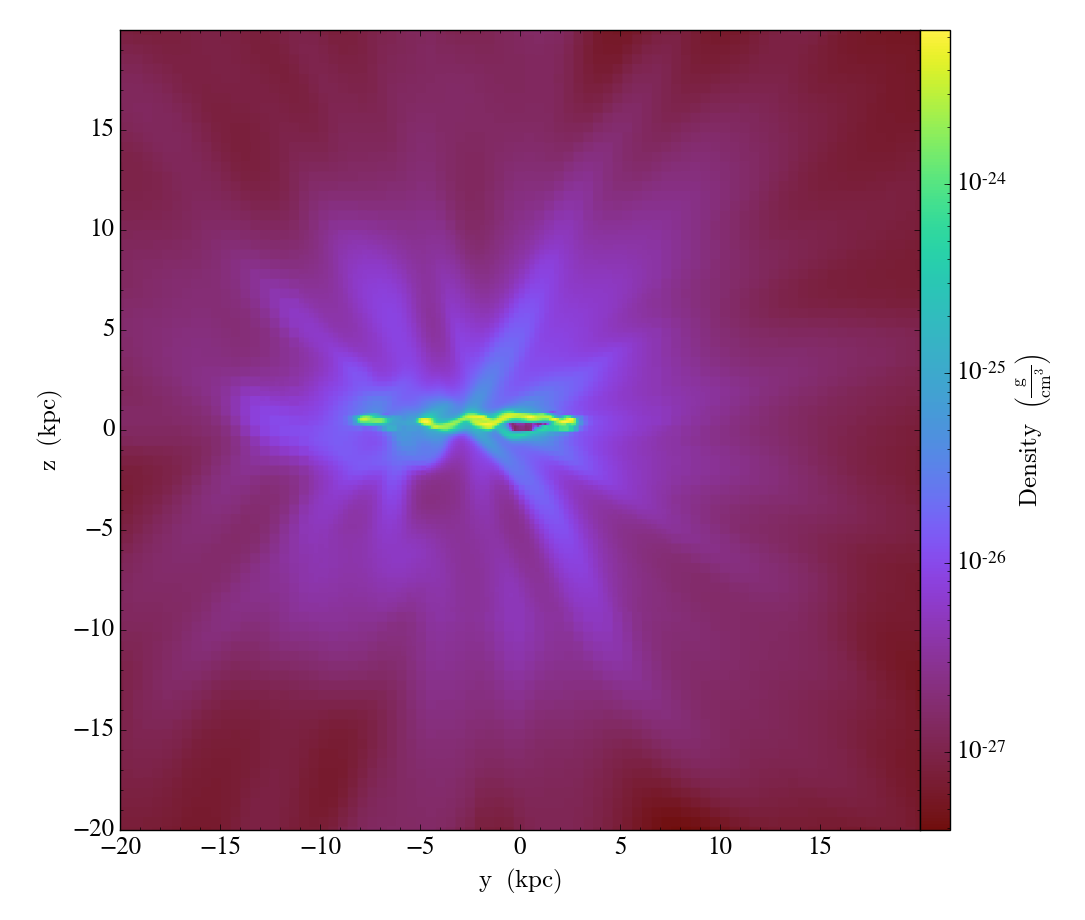

In [16]:
s.zoom(2.5)

yt : [INFO     ] 2016-10-10 10:54:37,618 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



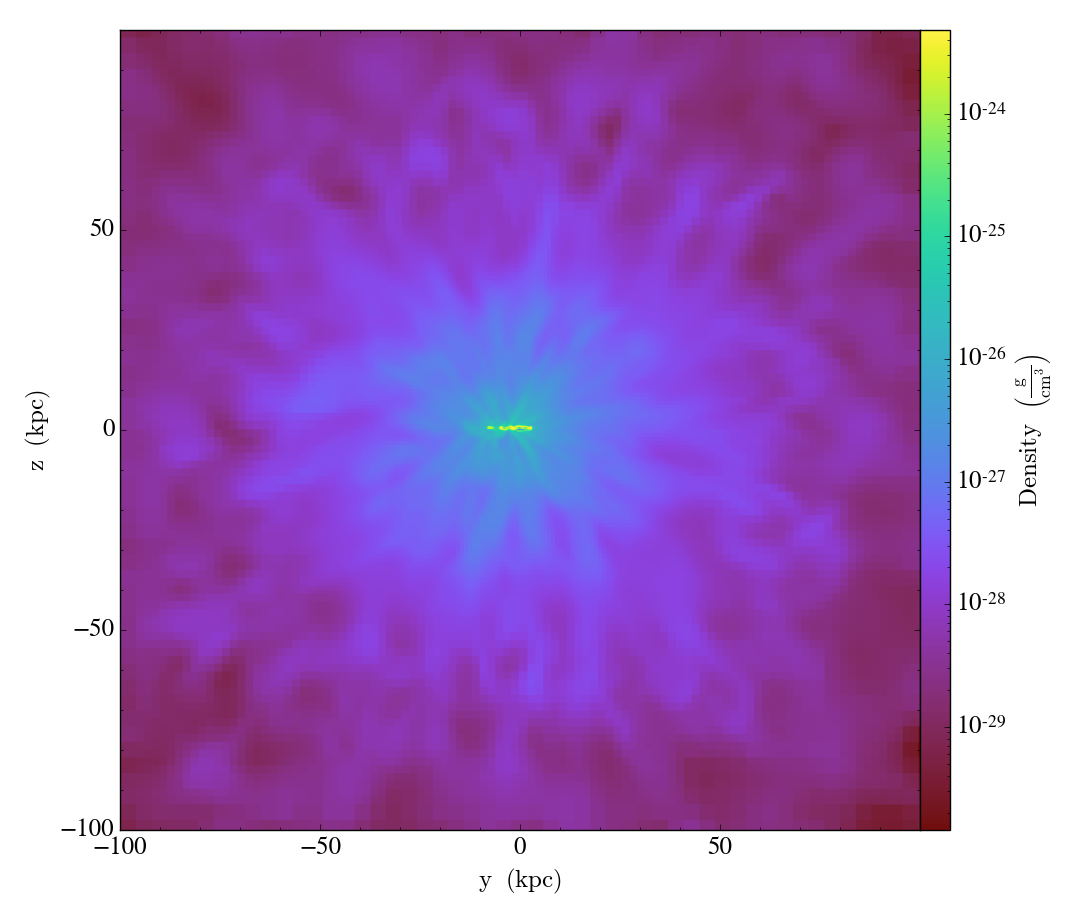

In [17]:
s.set_width((200,"kpc"))

/Users/jillnaiman1/yt-conda/lib/python2.7/site-packages/numpy/ma/core.py:827: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)



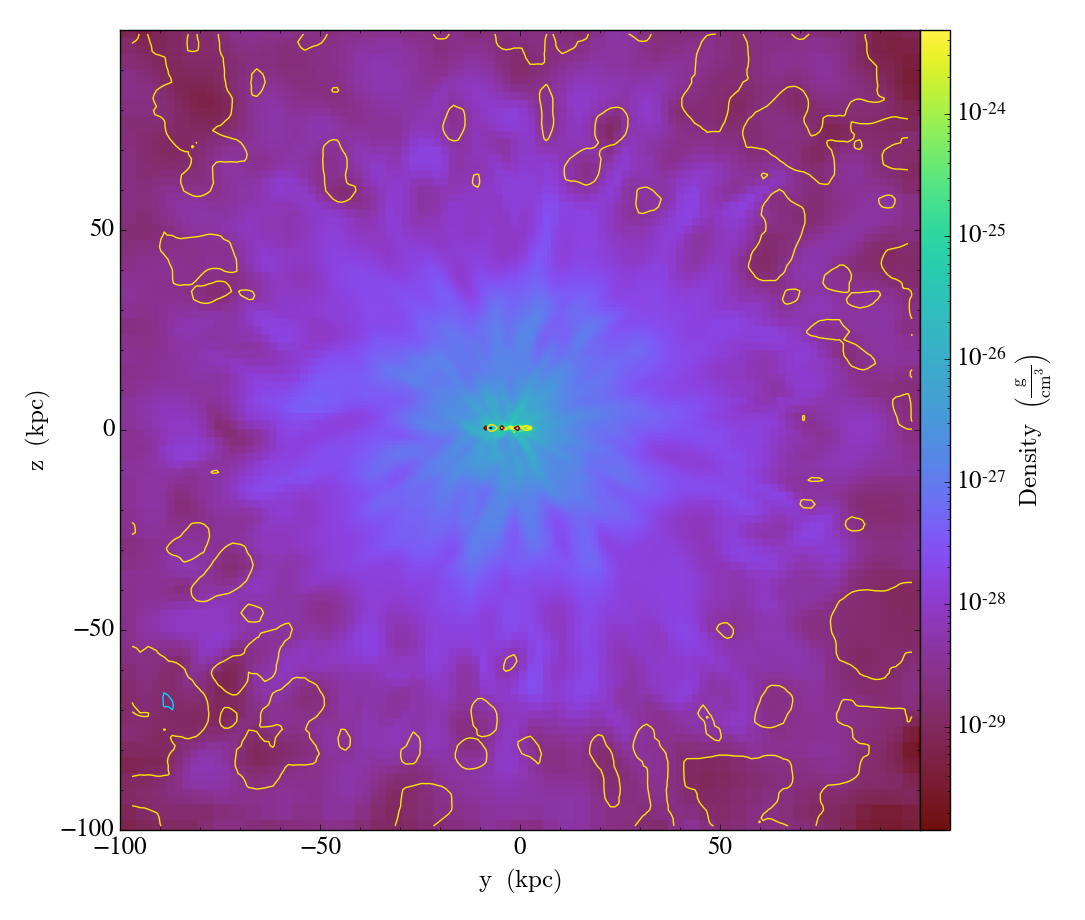

In [18]:
s.annotate_contour(('gas','temperature'))

In [19]:
s.annotate_contour?


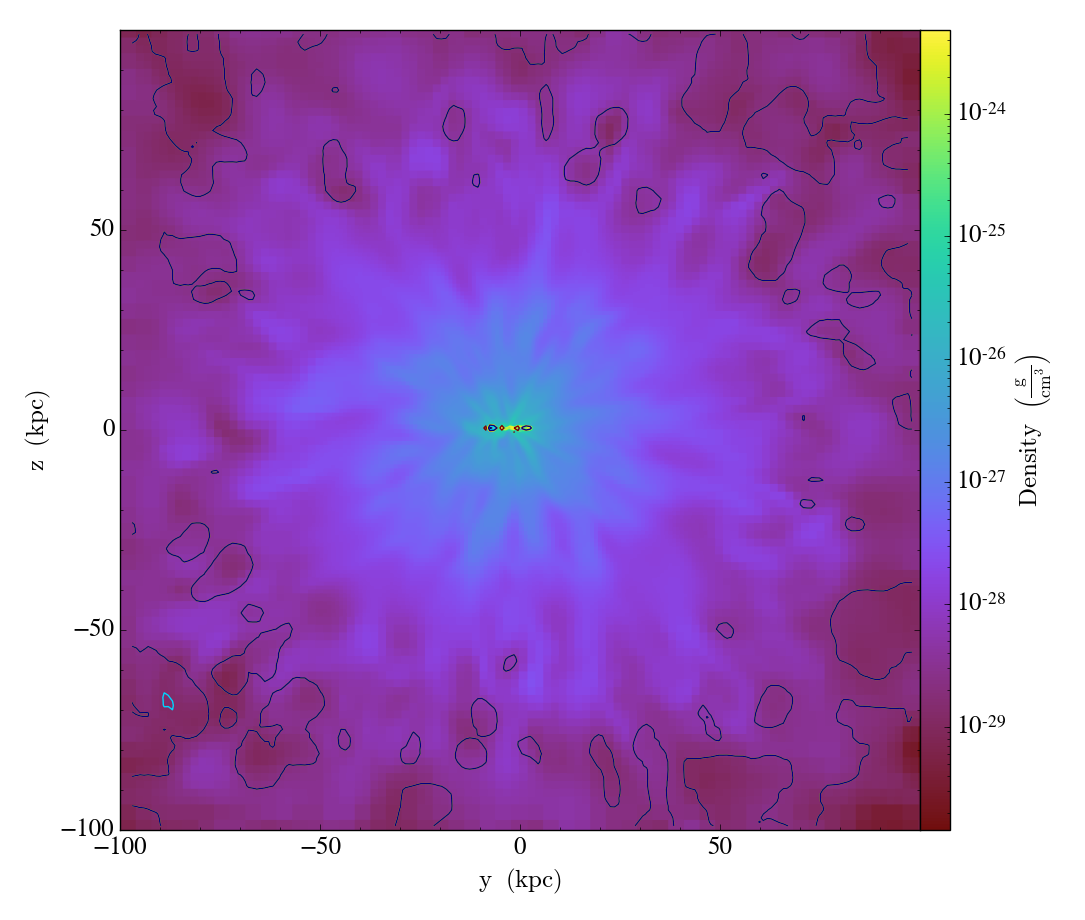

In [20]:
s.annotate_contour(("gas","temperature"), take_log=False, clim=(1e4,1e6))

yt : [INFO     ] 2016-10-10 10:54:42,868 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



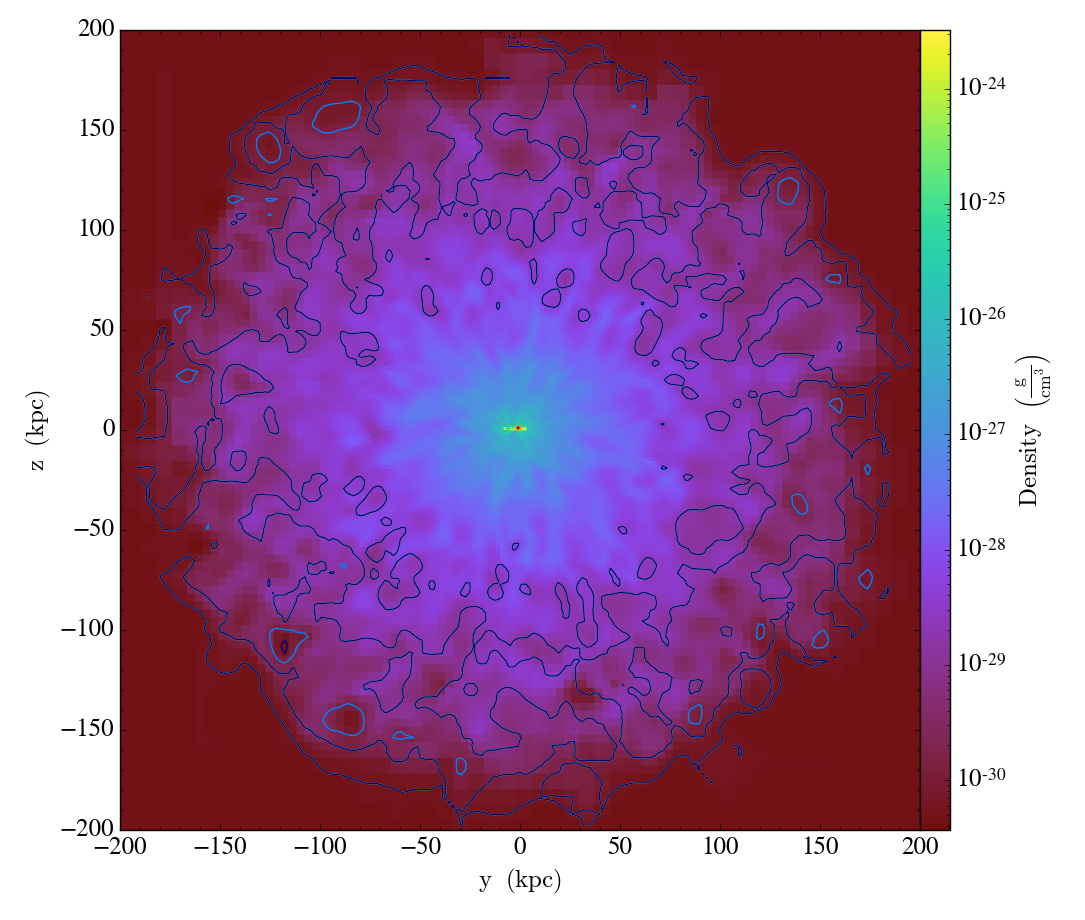

In [21]:
s.set_width((400,"kpc"))


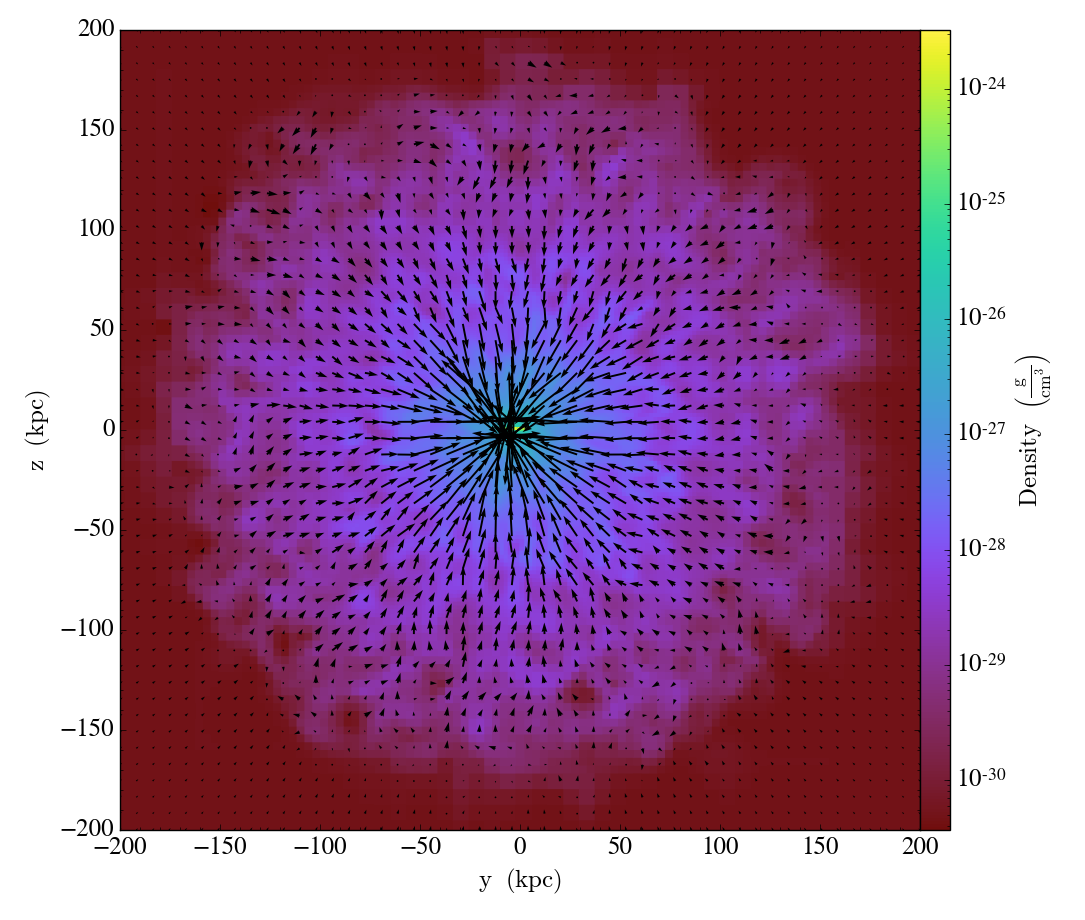

In [22]:
s.annotate_clear()
s.annotate_velocity()
s.show()

yt : [INFO     ] 2016-10-10 10:54:47,206 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



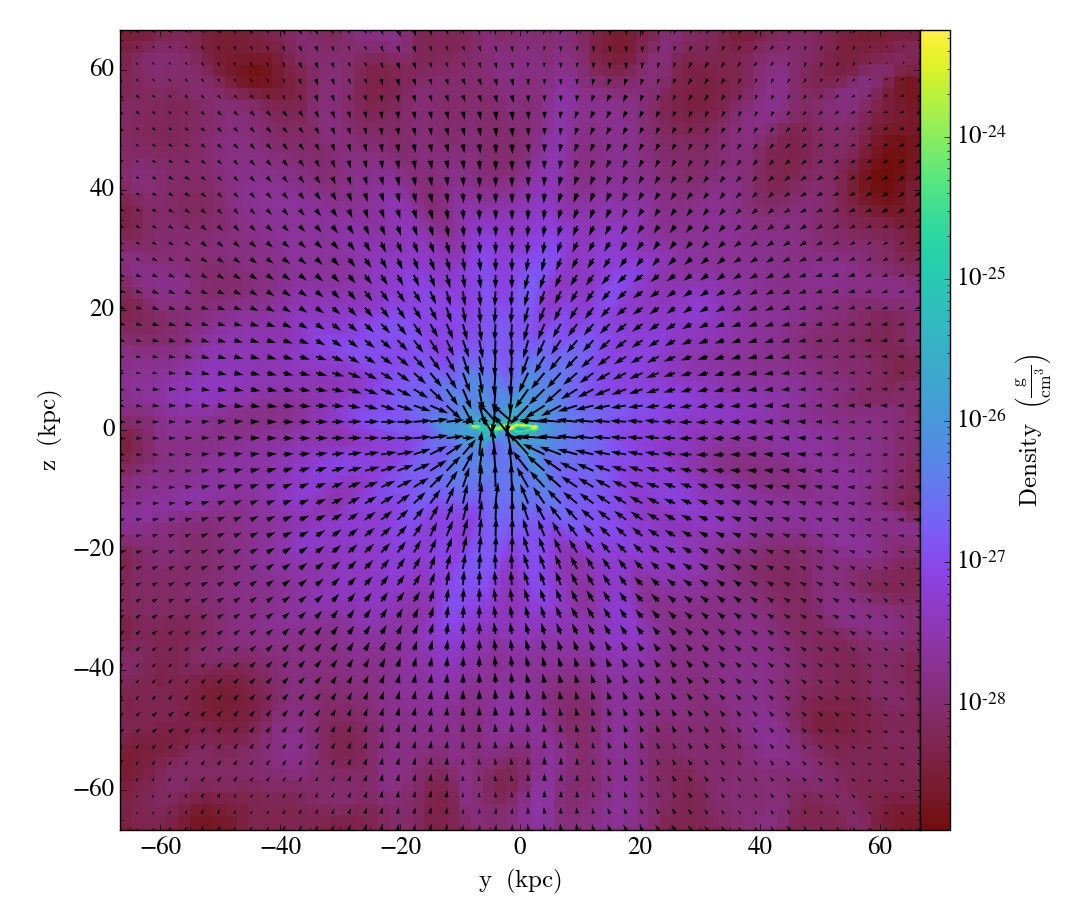

In [23]:
s.zoom(3)


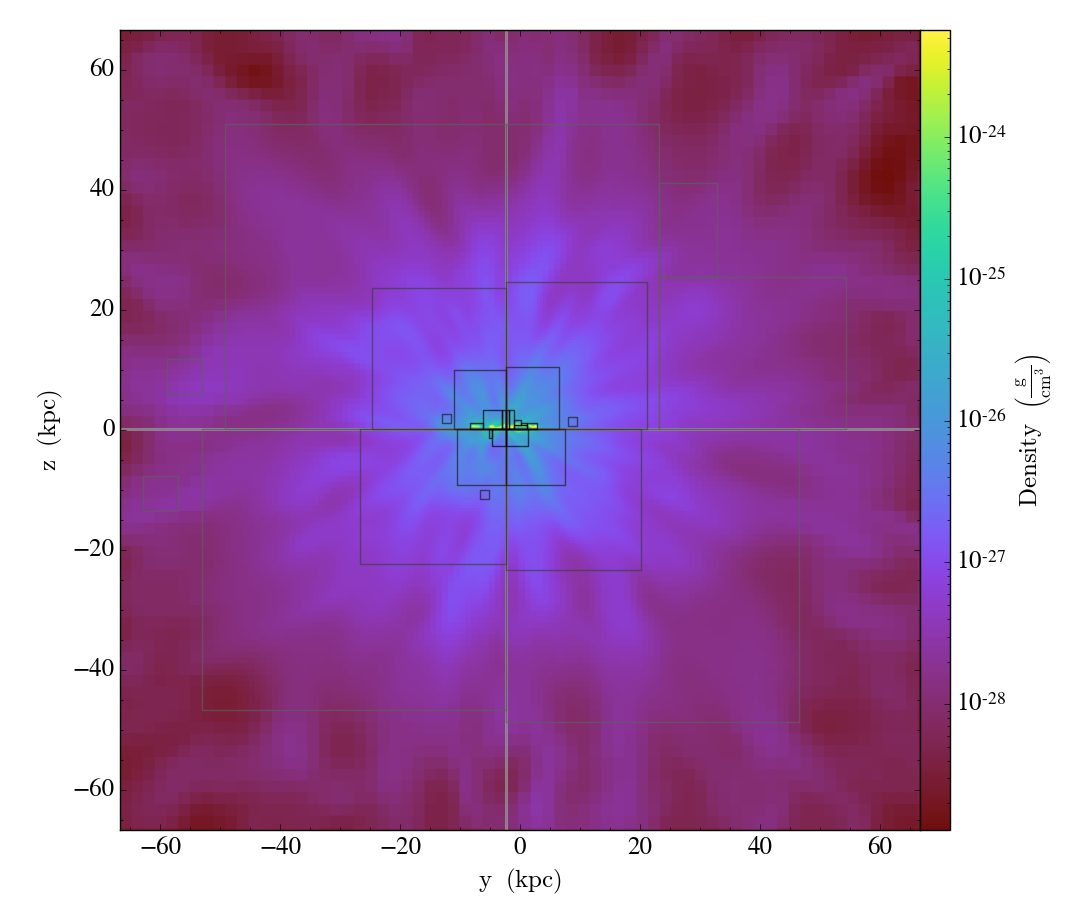

In [24]:
s.annotate_clear()
s.annotate_grids()
s.show()


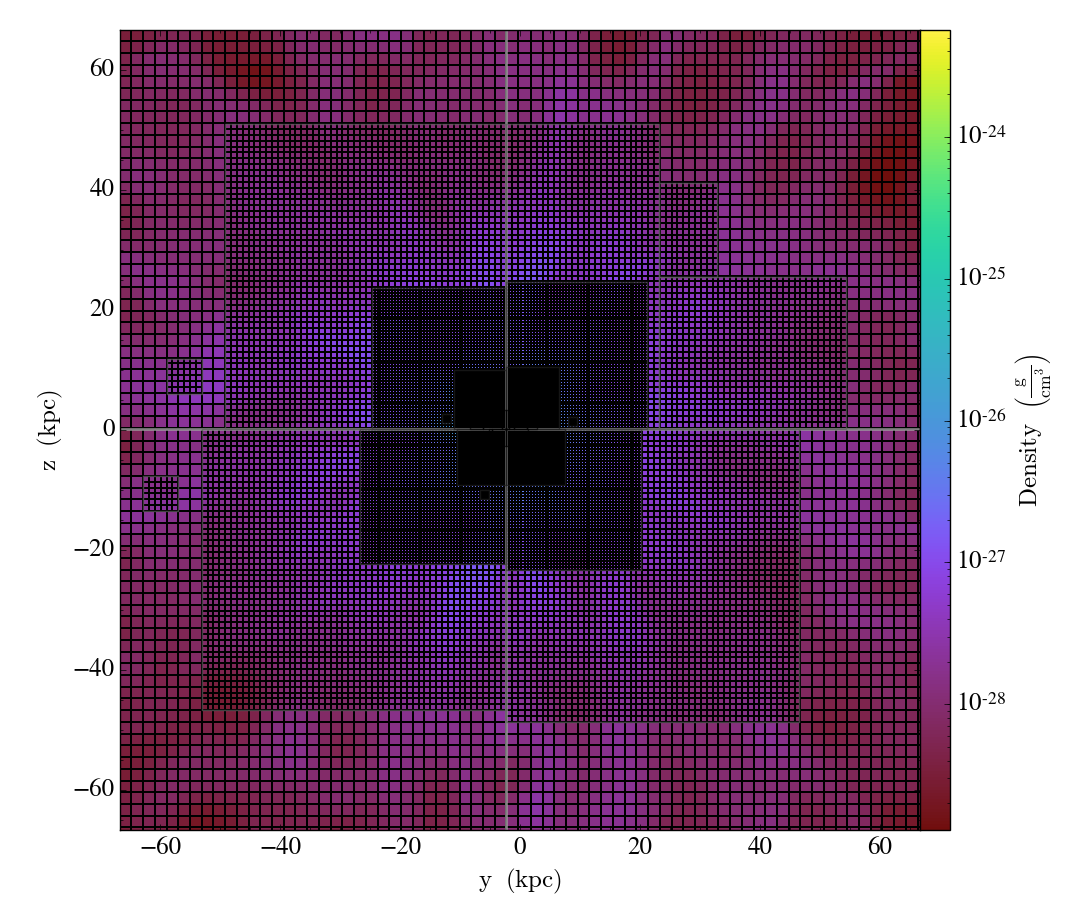

In [25]:
s.annotate_cell_edges()


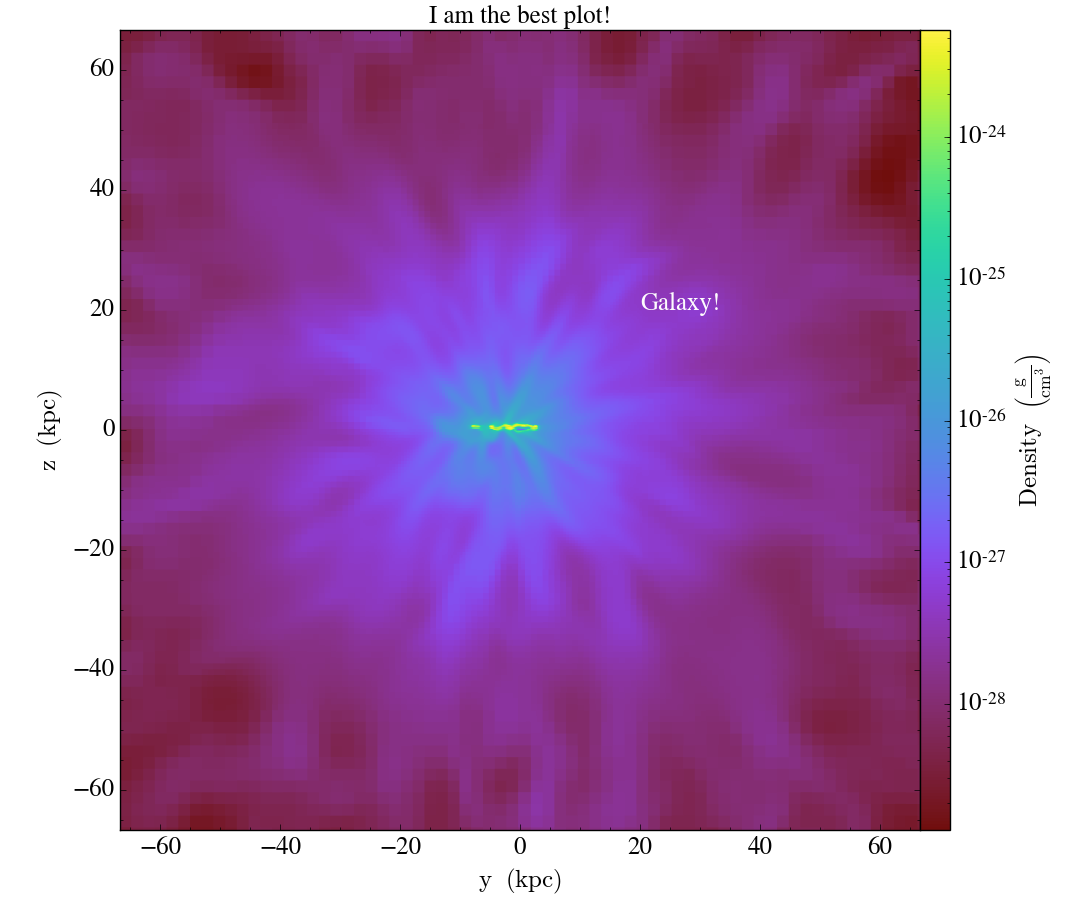

In [26]:
s.annotate_clear()
s.annotate_title('I am the best plot!')
s.annotate_text((20, 20), 'Galaxy!', coord_system='plot')


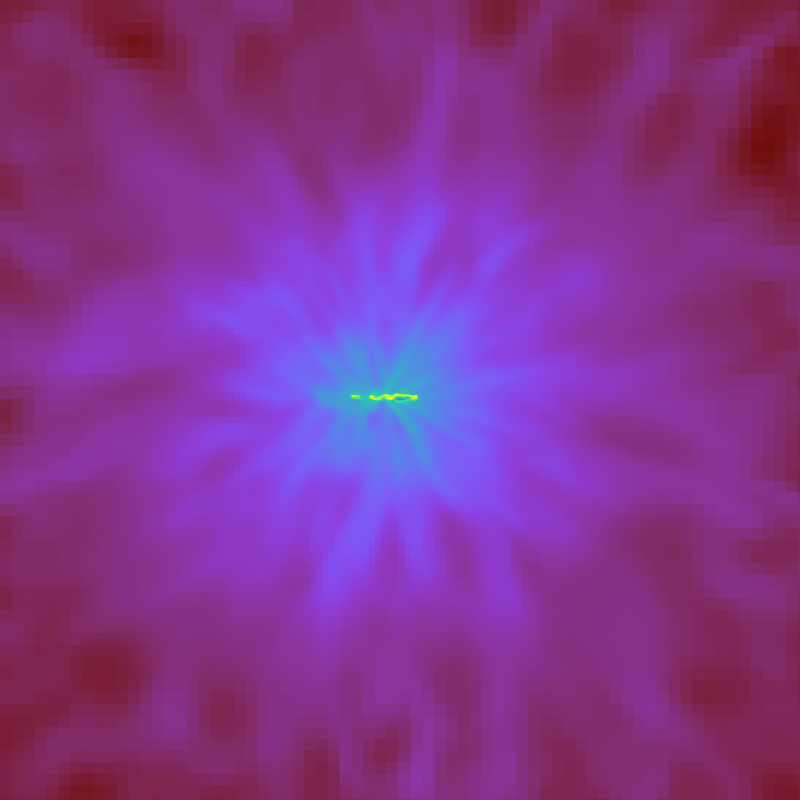

In [27]:
s.annotate_clear()
s.hide_colorbar()
s.hide_axes()

yt : [INFO     ] 2016-10-10 10:54:50,955 Projection completed
yt : [INFO     ] 2016-10-10 10:54:50,956 xlim = 0.000000 1.000000
yt : [INFO     ] 2016-10-10 10:54:50,956 ylim = 0.000000 1.000000
yt : [INFO     ] 2016-10-10 10:54:50,957 xlim = 0.000000 1.000000
yt : [INFO     ] 2016-10-10 10:54:50,958 ylim = 0.000000 1.000000
yt : [INFO     ] 2016-10-10 10:54:50,959 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



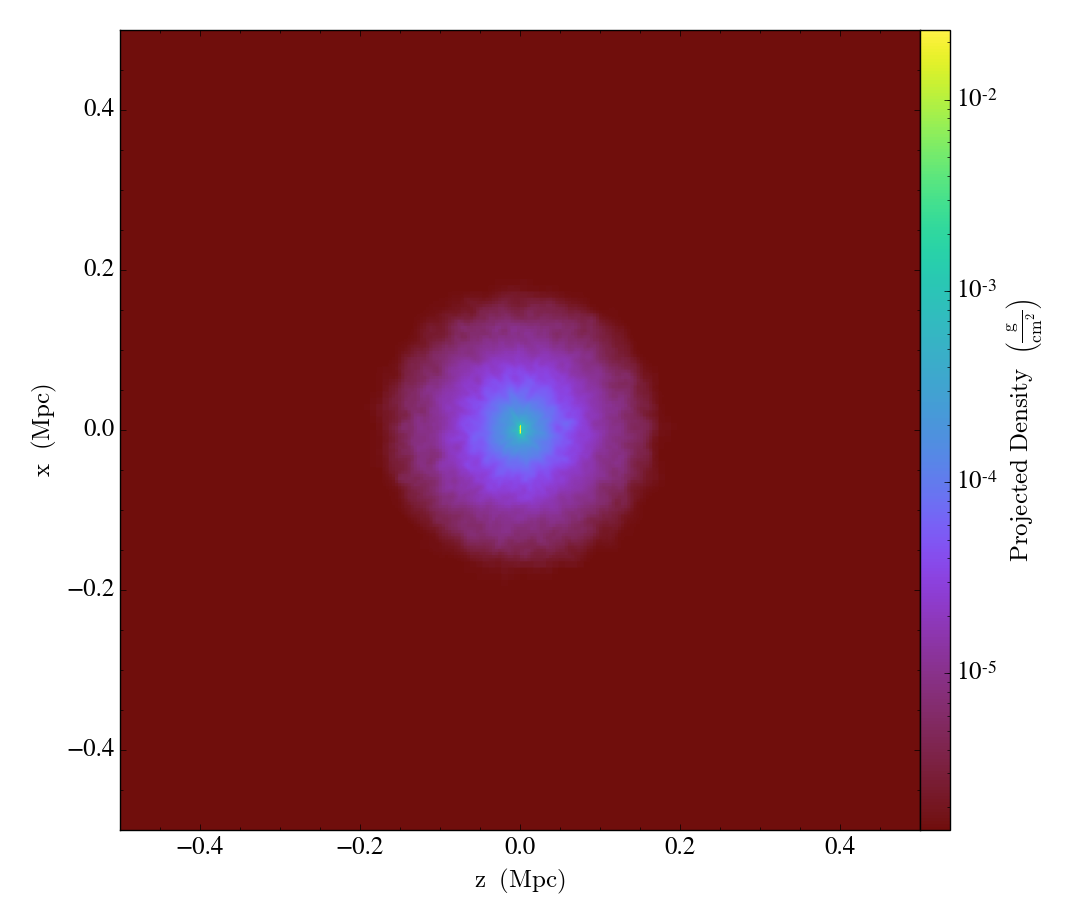

In [28]:
p = yt.ProjectionPlot(ds,'y','density')
p.show()

yt : [INFO     ] 2016-10-10 10:54:52,236 Projection completed
yt : [INFO     ] 2016-10-10 10:54:52,237 xlim = 0.000000 1.000000
yt : [INFO     ] 2016-10-10 10:54:52,238 ylim = 0.000000 1.000000
yt : [INFO     ] 2016-10-10 10:54:52,239 xlim = 0.000000 1.000000
yt : [INFO     ] 2016-10-10 10:54:52,239 ylim = 0.000000 1.000000
yt : [INFO     ] 2016-10-10 10:54:52,241 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



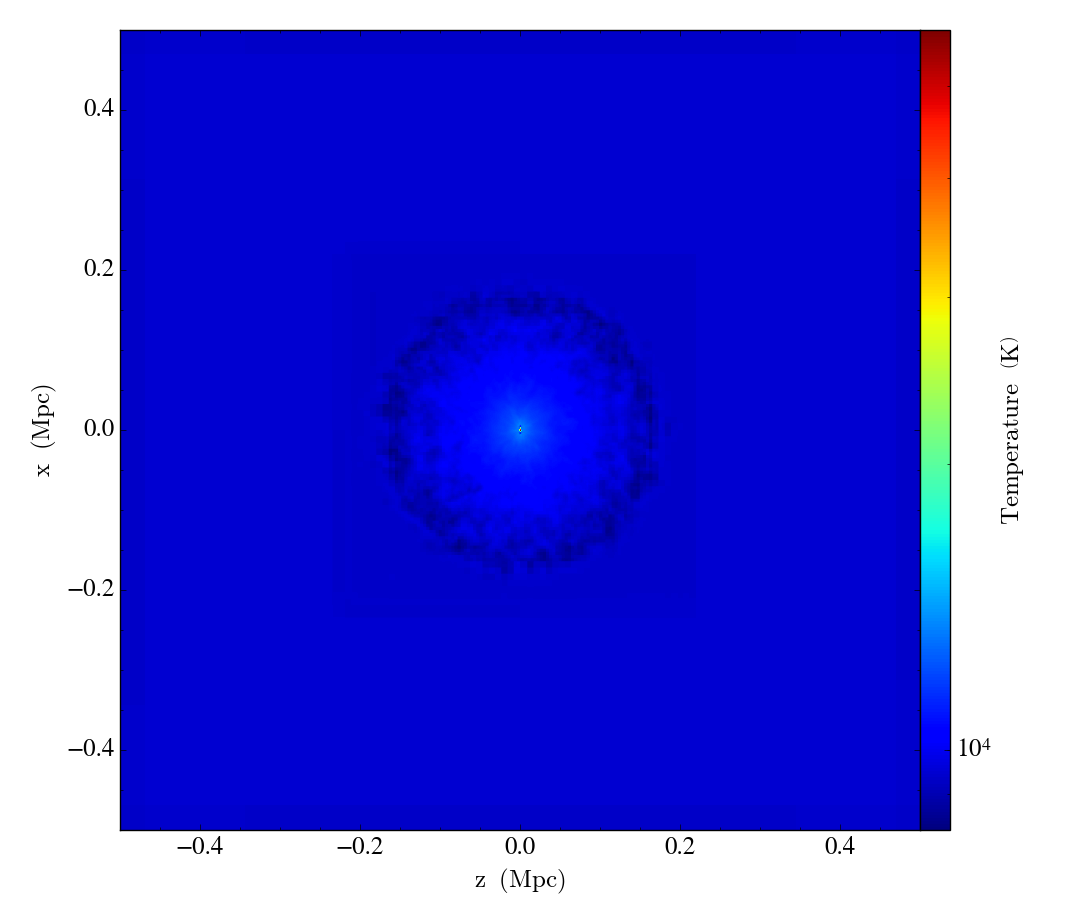

In [29]:
pw = yt.ProjectionPlot(ds,'y', 'temperature', weight_field='density')
pw.set_cmap('temperature','jet')
pw.show()

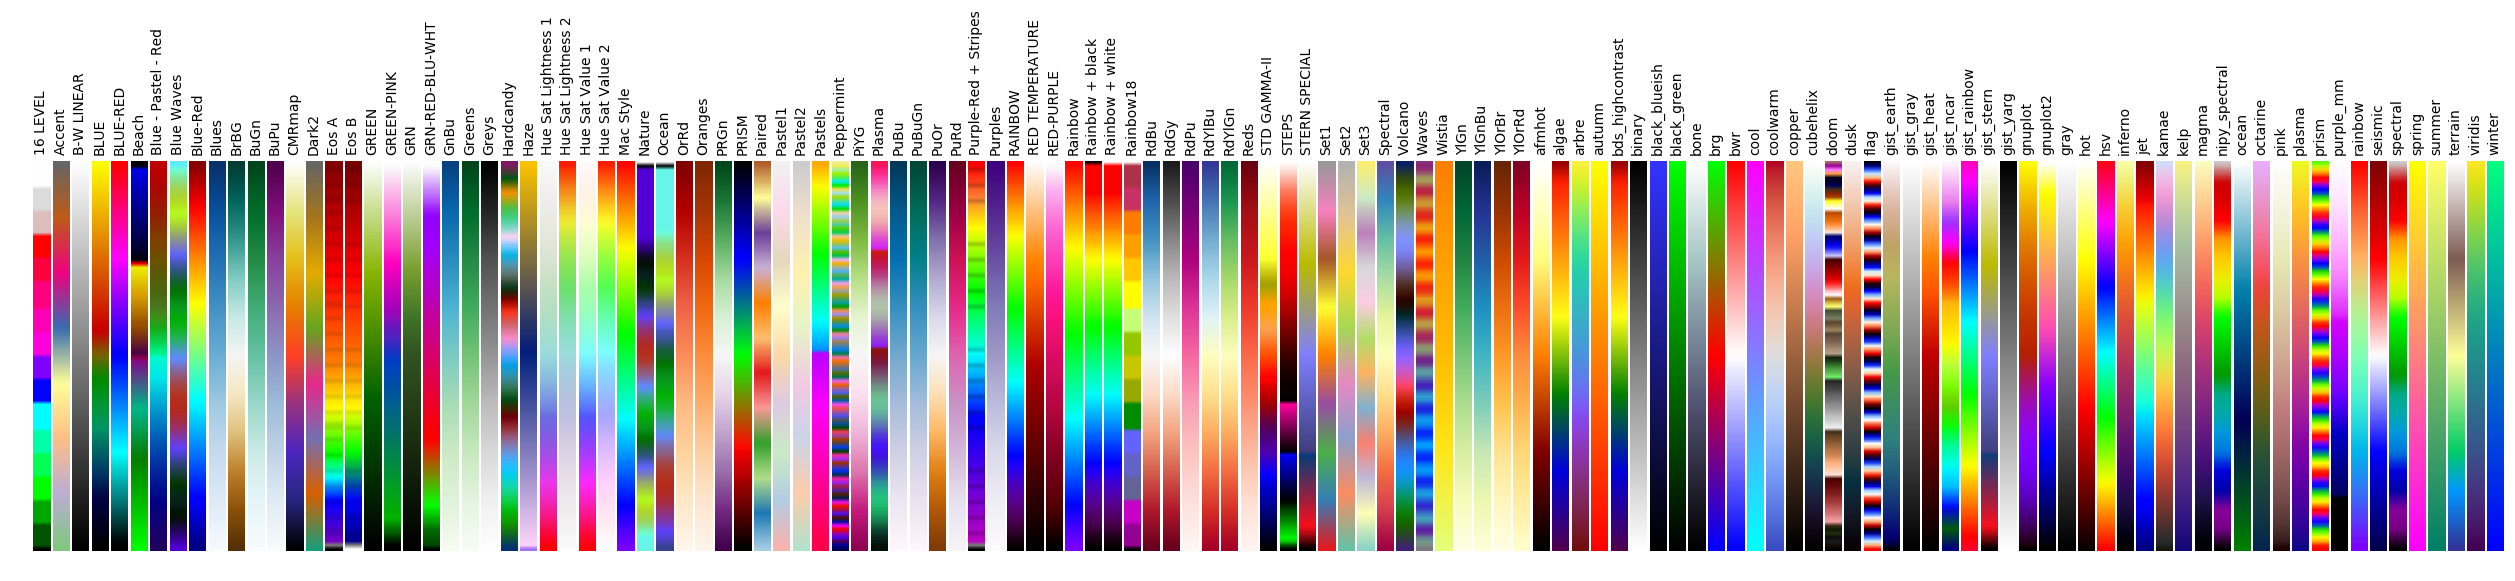

In [30]:
yt.show_colormaps()

In [31]:
sp = ds.sphere("center", (15, "kpc"))
L = sp.quantities.angular_momentum_vector()
print(L)


[ -8.85748212e+25  -8.51990642e+25  -4.99255795e+28] cm**2/s


yt : [INFO     ] 2016-10-10 10:55:05,404 xlim = -0.012499 0.012499
yt : [INFO     ] 2016-10-10 10:55:05,404 ylim = -0.012499 0.012499



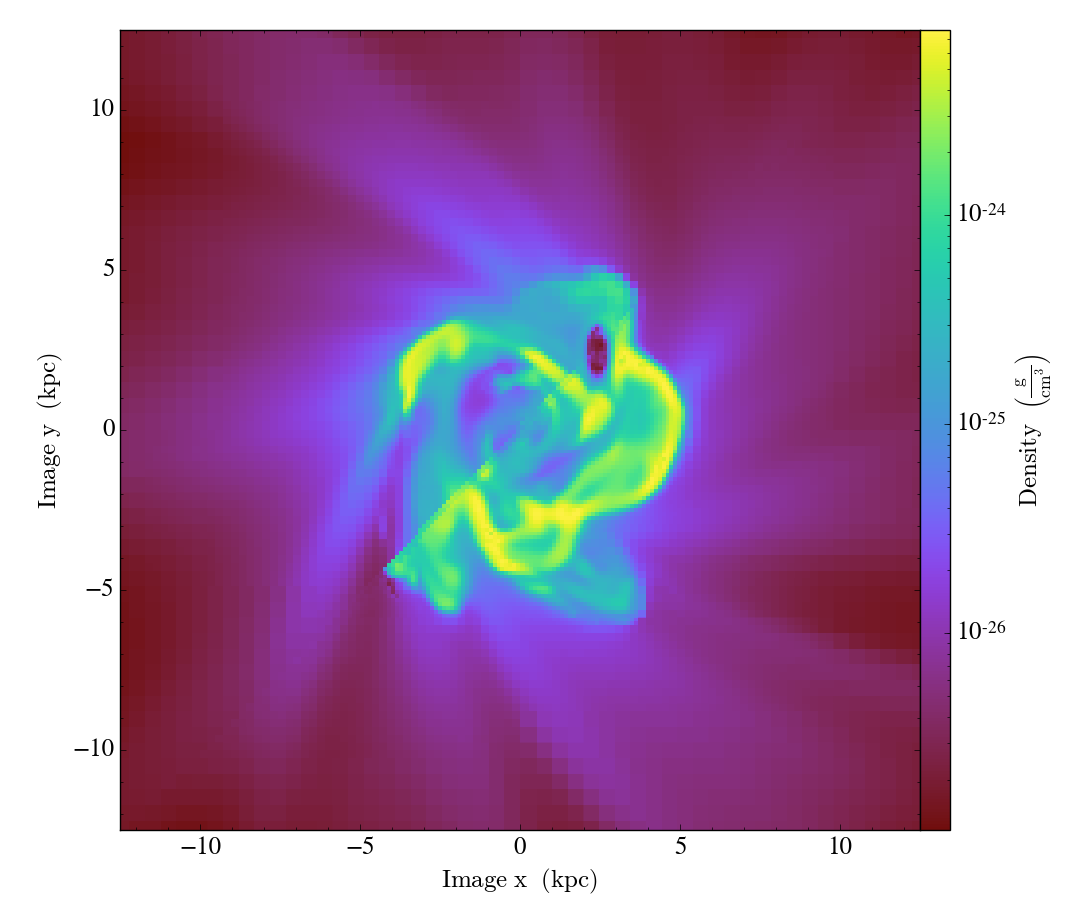

In [32]:
soff = yt.OffAxisSlicePlot(ds, L, "density", sp.center, (25,"kpc"))
soff.show()

yt : [INFO     ] 2016-10-10 10:55:06,236 xlim = -0.012499 0.012499
yt : [INFO     ] 2016-10-10 10:55:06,236 ylim = -0.012499 0.012499
yt : [INFO     ] 2016-10-10 10:55:06,237 zlim = -0.500000 0.500000
yt : [INFO     ] 2016-10-10 10:55:06,237 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



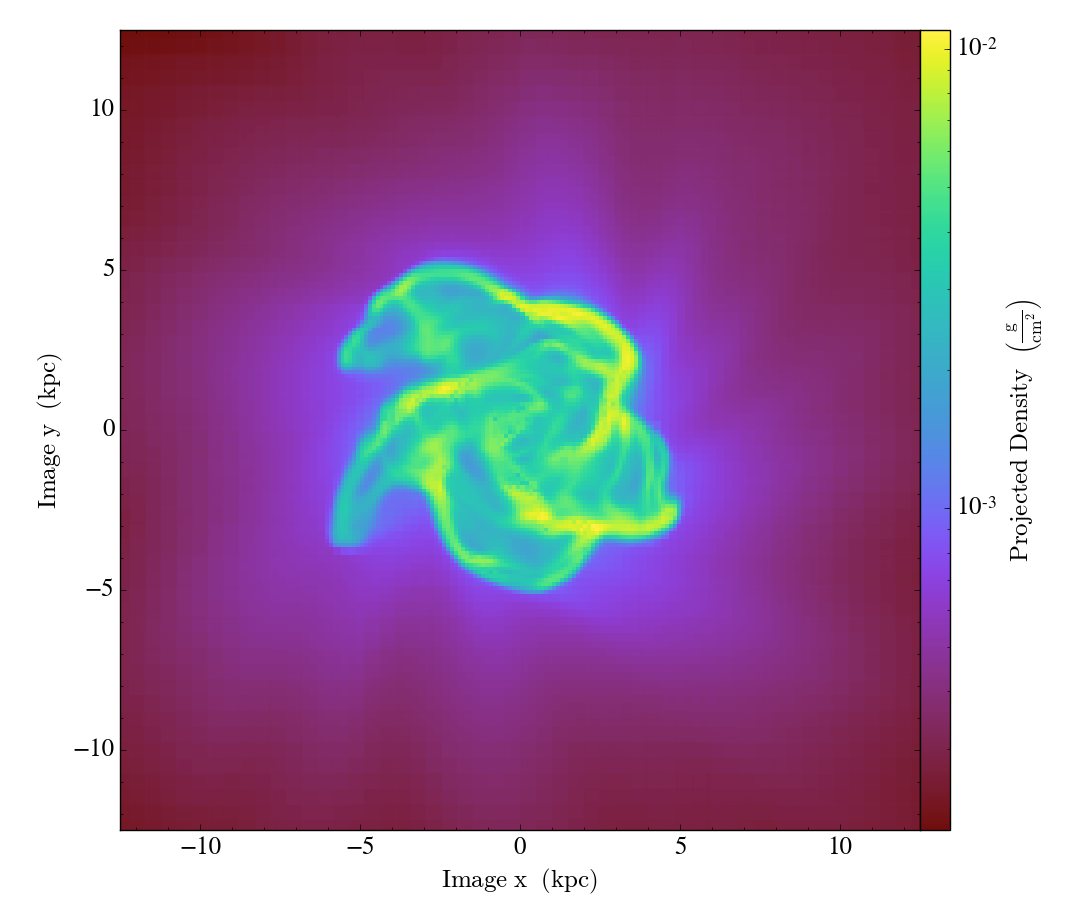

In [33]:
poff = yt.OffAxisProjectionPlot(ds, L, 'density', sp.center, (25,"kpc"))
poff.show()


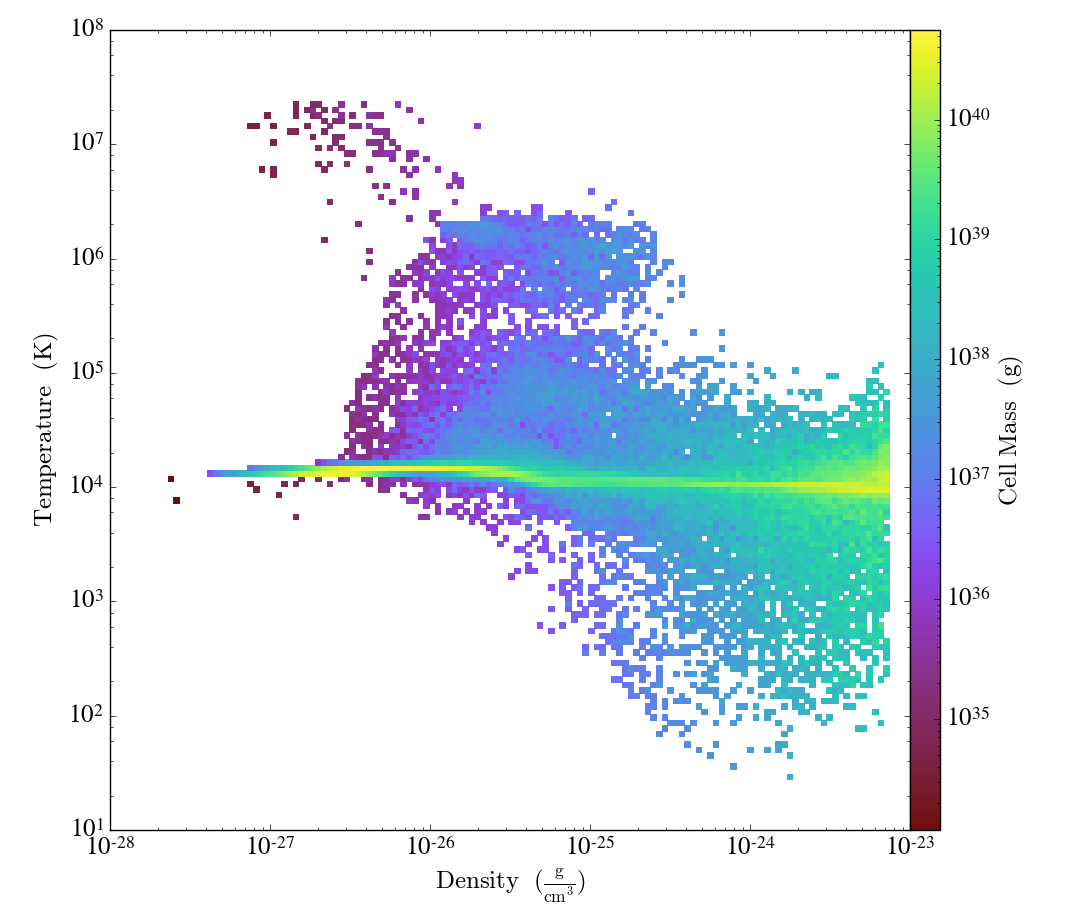

In [34]:
ph = yt.PhasePlot(sp, "density", "temperature", "cell_mass", weight_field=None)
ph.show()


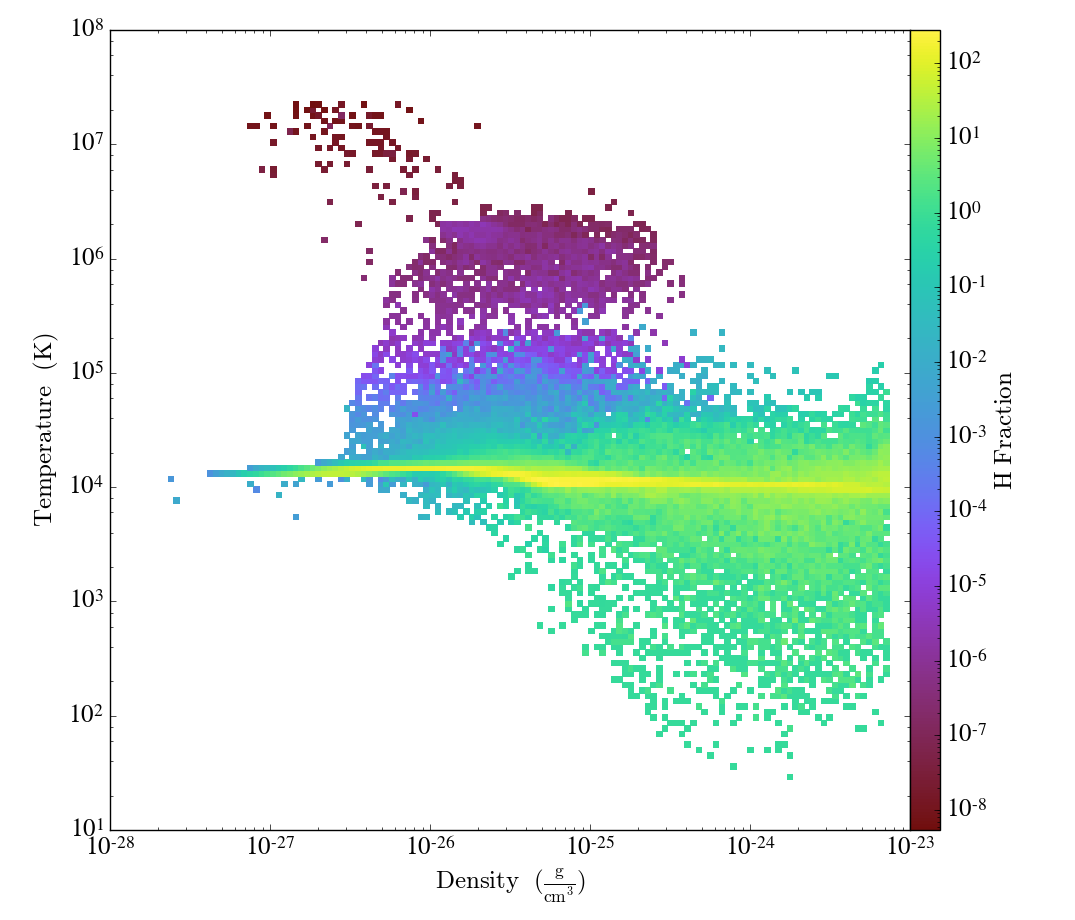

In [35]:
ph = yt.PhasePlot(sp, "density", "temperature", "H_fraction", weight_field=None)
ph.show()


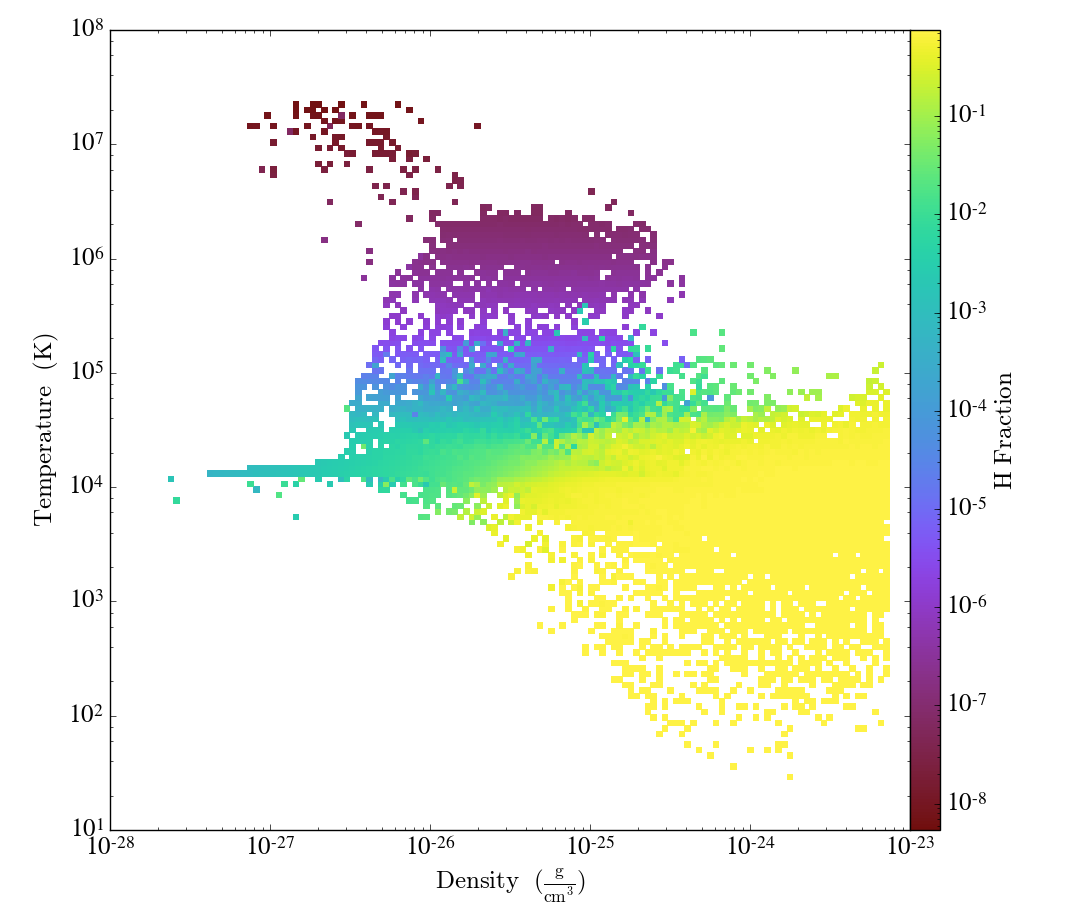

In [36]:
ph = yt.PhasePlot(sp, ('gas','density'), ('gas','temperature'), ('gas','H_fraction'))
ph.show()


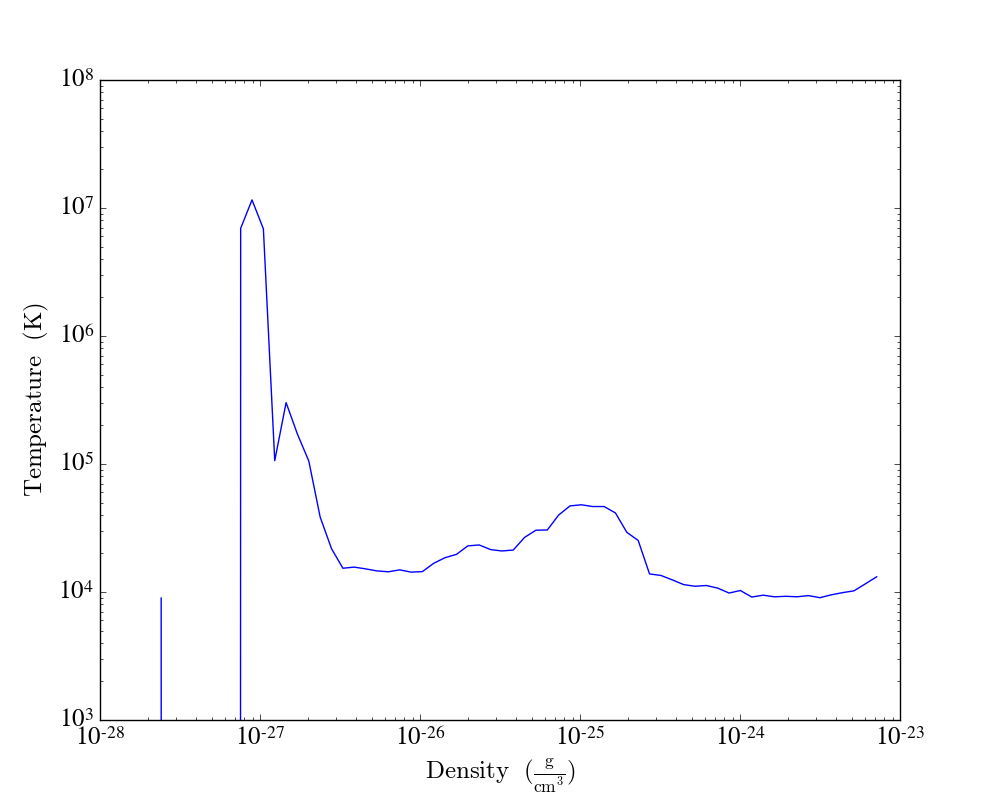

In [37]:
my_disk = ds.disk(ds.domain_center, [0.0, 0.0, 1.0], (10, "kpc"), (3, "kpc"))
p1d = yt.ProfilePlot(my_disk, "density", "temperature")
p1d.show()


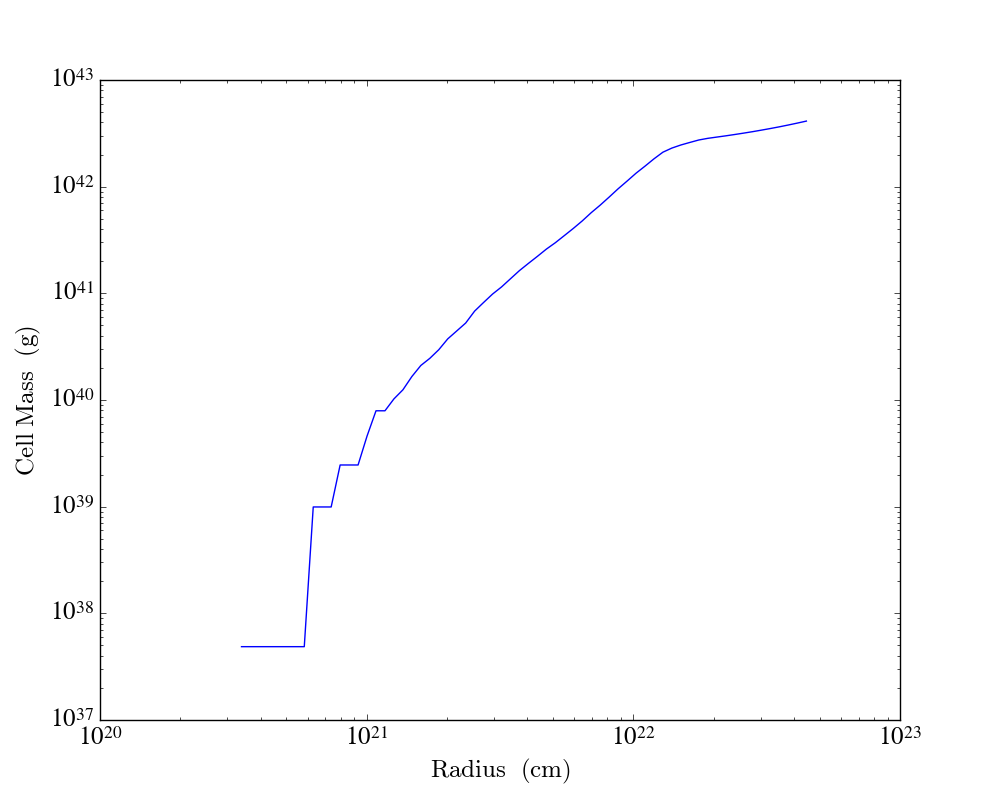

In [38]:
p1d_acc = yt.ProfilePlot(sp, "radius", "cell_mass", weight_field=None, accumulation=True)
p1d_acc.show()